<a href="https://colab.research.google.com/github/nimajr/MachineLearning2023/blob/main/final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# خواندن فایل CSV (اگر نام فایل را می‌دانی، جایگزین کن)
df = pd.read_csv("/content/pjm_hourly_est.csv")

# نمایش اطلاعات کلی دیتاست
print("اطلاعات کلی دیتاست:")
print(df.info())

# نمایش ۵ ردیف اول
print("\nنمونه‌ای از داده‌ها:")
print(df.head())

# بررسی تعداد مقادیر گمشده در هر ستون
print("\nمقادیر گمشده در هر ستون:")
print(df.isnull().sum())

# نمایش آمار توصیفی از داده‌ها
print("\nآمار توصیفی:")
print(df.describe())


اطلاعات کلی دیتاست:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178262 entries, 0 to 178261
Data columns (total 13 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Datetime  178262 non-null  object 
 1   AEP       121273 non-null  float64
 2   COMED     66497 non-null   float64
 3   DAYTON    121275 non-null  float64
 4   DEOK      57739 non-null   float64
 5   DOM       116189 non-null  float64
 6   DUQ       119068 non-null  float64
 7   EKPC      45334 non-null   float64
 8   FE        62874 non-null   float64
 9   NI        58450 non-null   float64
 10  PJME      145366 non-null  float64
 11  PJMW      143206 non-null  float64
 12  PJM_Load  32896 non-null   float64
dtypes: float64(12), object(1)
memory usage: 17.7+ MB
None

نمونه‌ای از داده‌ها:
              Datetime  AEP  COMED  DAYTON  DEOK  DOM  DUQ  EKPC  FE  NI  \
0  1998-12-31 01:00:00  NaN    NaN     NaN   NaN  NaN  NaN   NaN NaN NaN   
1  1998-12-31 02:00:00  NaN    NaN  

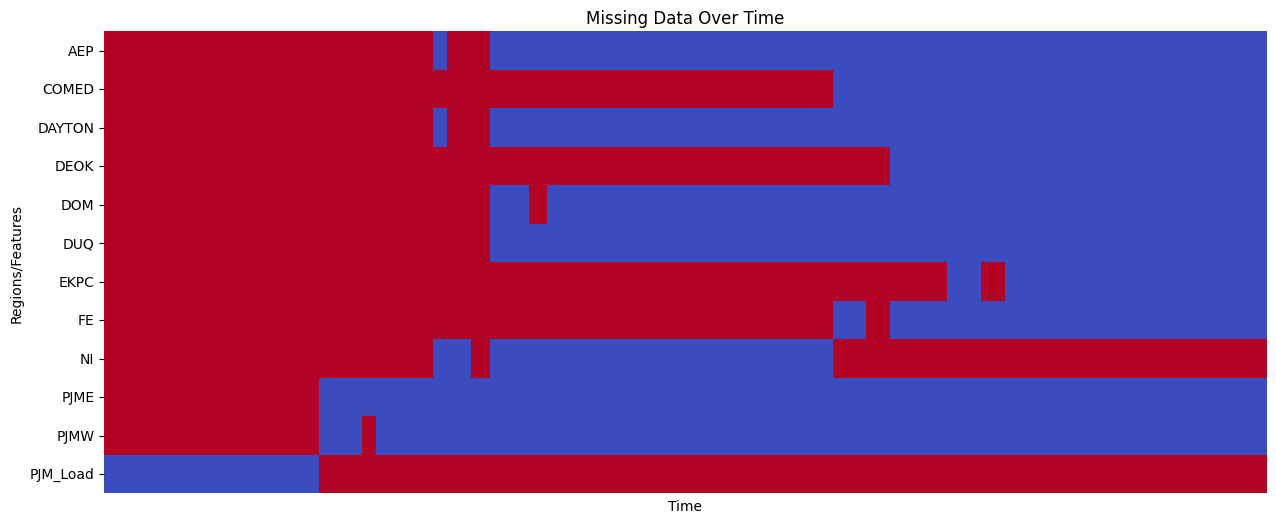

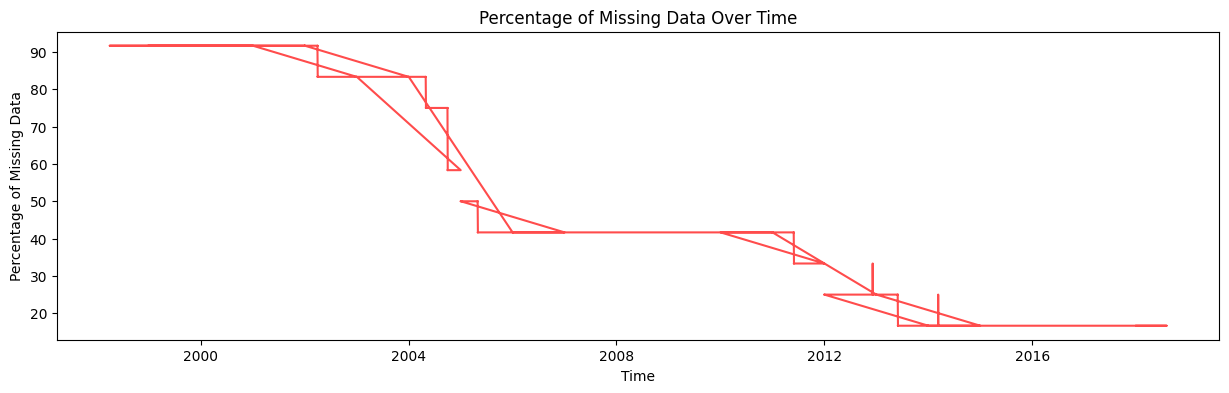

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# تبدیل ستون 'Datetime' به نوع datetime
df['Datetime'] = pd.to_datetime(df['Datetime'])
df.set_index('Datetime', inplace=True)

# بررسی تعداد مقادیر نال در هر بازه زمانی
missing_data = df.isnull().astype(int)

plt.figure(figsize=(15, 6))
sns.heatmap(missing_data.T, cmap="coolwarm", cbar=False, xticklabels=False)
plt.xlabel("Time")
plt.ylabel("Regions/Features")
plt.title("Missing Data Over Time")
plt.show()

# بررسی توزیع مقادیر گمشده به‌صورت درصد در طول زمان
missing_timeline = df.isnull().mean(axis=1) * 100

plt.figure(figsize=(15, 4))
plt.plot(missing_timeline.index, missing_timeline, color='red', alpha=0.7)
plt.xlabel("Time")
plt.ylabel("Percentage of Missing Data")
plt.title("Percentage of Missing Data Over Time")
plt.show()


In [ ]:
import pandas as pd
!pip install seaborn
import seaborn as sns

# خواندن فایل داده
file_path = "/content/pjm_hourly_est.csv"
df = pd.read_csv(file_path)

# نمایش اطلاعات کلی دیتاست
print(df.info())  # بررسی تعداد سطرها، نوع داده‌ها و مقدارهای گمشده
print(df.head())  # نمایش چند نمونه از داده‌ها
print(df.describe())  # بررسی آماری داده‌ها


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178262 entries, 0 to 178261
Data columns (total 13 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Datetime  178262 non-null  object 
 1   AEP       121273 non-null  float64
 2   COMED     66497 non-null   float64
 3   DAYTON    121275 non-null  float64
 4   DEOK      57739 non-null   float64
 5   DOM       116189 non-null  float64
 6   DUQ       119068 non-null  float64
 7   EKPC      45334 non-null   float64
 8   FE        62874 non-null   float64
 9   NI        58450 non-null   float64
 10  PJME      145366 non-null  float64
 11  PJMW      143206 non-null  float64
 12  PJM_Load  32896 non-null   float64
dtypes: float64(12), object(1)
memory usage: 17.7+ MB
None
              Datetime  AEP  COMED  DAYTON  DEOK  DOM  DUQ  EKPC  FE  NI  \
0  1998-12-31 01:00:00  NaN    NaN     NaN   NaN  NaN  NaN   NaN NaN NaN   
1  1998-12-31 02:00:00  NaN    NaN     NaN   NaN  NaN  NaN   NaN NaN NaN   
2 

In [ ]:
print(df.columns)  # نمایش نام ستون‌ها


Index(['Datetime', 'AEP', 'COMED', 'DAYTON', 'DEOK', 'DOM', 'DUQ', 'EKPC',
       'FE', 'NI', 'PJME', 'PJMW', 'PJM_Load'],
      dtype='object')


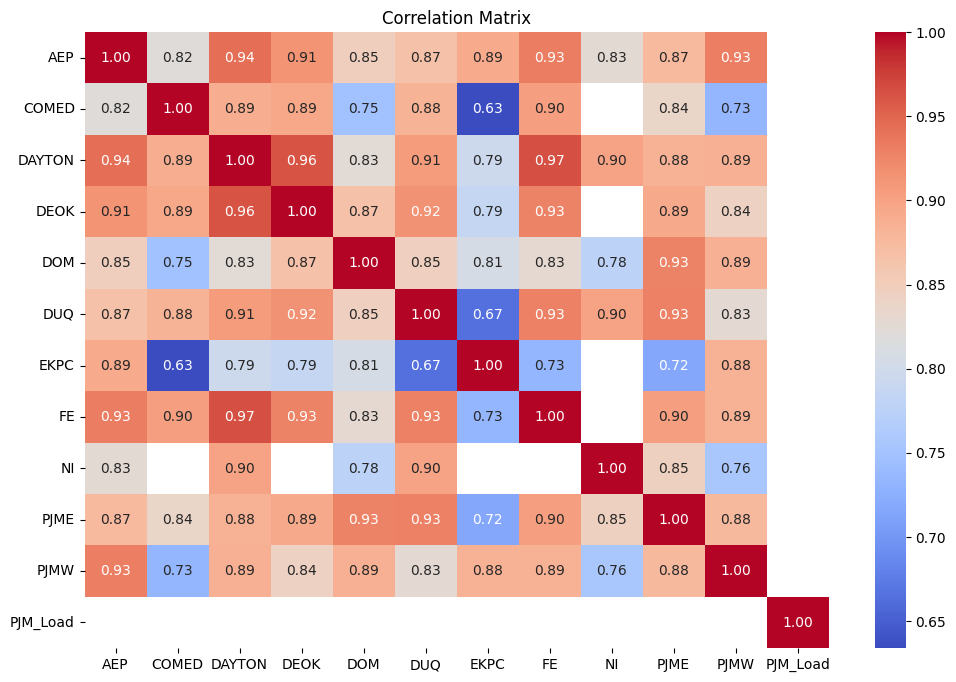

In [ ]:
# محاسبه همبستگی فقط برای ستون‌های عددی
correlation_matrix = df.drop(columns=['Datetime']).corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


In [ ]:
print(df.isnull().sum())  # بررسی تعداد داده‌های گمشده در هر ستون


Datetime         0
AEP          56989
COMED       111765
DAYTON       56987
DEOK        120523
DOM          62073
DUQ          59194
EKPC        132928
FE          115388
NI          119812
PJME         32896
PJMW         35056
PJM_Load    145366
dtype: int64


In [ ]:
missing_percentage = (df.isnull().sum() / len(df)) * 100
print(missing_percentage)


Datetime     0.000000
AEP         31.969236
COMED       62.697041
DAYTON      31.968114
DEOK        67.610035
DOM         34.821218
DUQ         33.206180
EKPC        74.568893
FE          64.729443
NI          67.211184
PJME        18.453737
PJMW        19.665436
PJM_Load    81.546263
dtype: float64


In [ ]:
threshold = 0.6 * len(df)  # حد آستانه ۶۰٪
df = df.dropna(axis=1, thresh=threshold)


In [ ]:
print(df.isnull().sum())


Datetime        0
AEP         56989
DAYTON      56987
DOM         62073
DUQ         59194
PJME        32896
PJMW        35056
dtype: int64


In [ ]:
missing_percentage = (df.isnull().sum() / len(df)) * 100
print(missing_percentage)


Datetime     0.000000
AEP         31.969236
DAYTON      31.968114
DOM         34.821218
DUQ         33.206180
PJME        18.453737
PJMW        19.665436
dtype: float64


الان دیتا هایی که بالای 60 درصد بودن پاک شدن و برای مرحله بعد میریم که همینا رو تمیز تر کنیم
براساس میانگین همسایه ها کد زیر کار میکنه

In [ ]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
df.iloc[:, 1:] = imputer.fit_transform(df.iloc[:, 1:])


KeyboardInterrupt: 

In [ ]:
df['AEP'] = df['AEP'].fillna(df['AEP'].rolling(5, min_periods=1).mean())
df['DAYTON'] = df['DAYTON'].fillna(df['DAYTON'].rolling(5, min_periods=1).mean())
df['DOM'] = df['DOM'].fillna(df['DOM'].rolling(5, min_periods=1).mean())


In [ ]:
missing_percentage = (df.isnull().sum() / len(df)) * 100
print(missing_percentage)


Datetime     0.000000
AEP         31.965870
DAYTON      31.965870
DOM         34.818974
DUQ         33.206180
PJME        18.453737
PJMW        19.665436
dtype: float64


پس این روشا خیلیم خوب نیستن!


In [ ]:
df.fillna(method='ffill', inplace=True)  # پر کردن با مقدار قبلی
df.fillna(method='bfill', inplace=True)  # پر کردن با مقدار بعدی (اگر مقدار قبلی وجود نداشت)


<ipython-input-169-05f7c4f91168>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # پر کردن با مقدار قبلی
<ipython-input-169-05f7c4f91168>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # پر کردن با مقدار بعدی (اگر مقدار قبلی وجود نداشت)


In [ ]:
missing_percentage = (df.isnull().sum() / len(df)) * 100
print(missing_percentage)


Datetime    0.0
AEP         0.0
DAYTON      0.0
DOM         0.0
DUQ         0.0
PJME        0.0
PJMW        0.0
dtype: float64


حالا شد :))


In [ ]:
df['Datetime'] = pd.to_datetime(df['Datetime'])  # تبدیل به datetime
df.set_index('Datetime', inplace=True)  # تنظیم به عنوان ایندکس


In [ ]:
df['hour'] = df.index.hour
df['day_of_week'] = df.index.dayofweek
df['month'] = df.index.month
df['is_weekend'] = df['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)  # تعیین تعطیلات


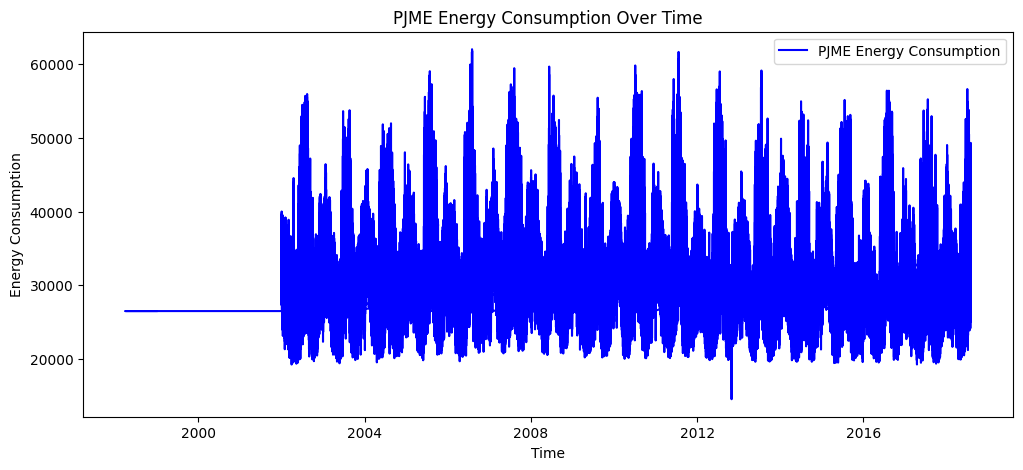

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.plot(df.index, df['PJME'], label='PJME Energy Consumption', color='b')
plt.xlabel('Time')
plt.ylabel('Energy Consumption')
plt.title('PJME Energy Consumption Over Time')
plt.legend()
plt.show()


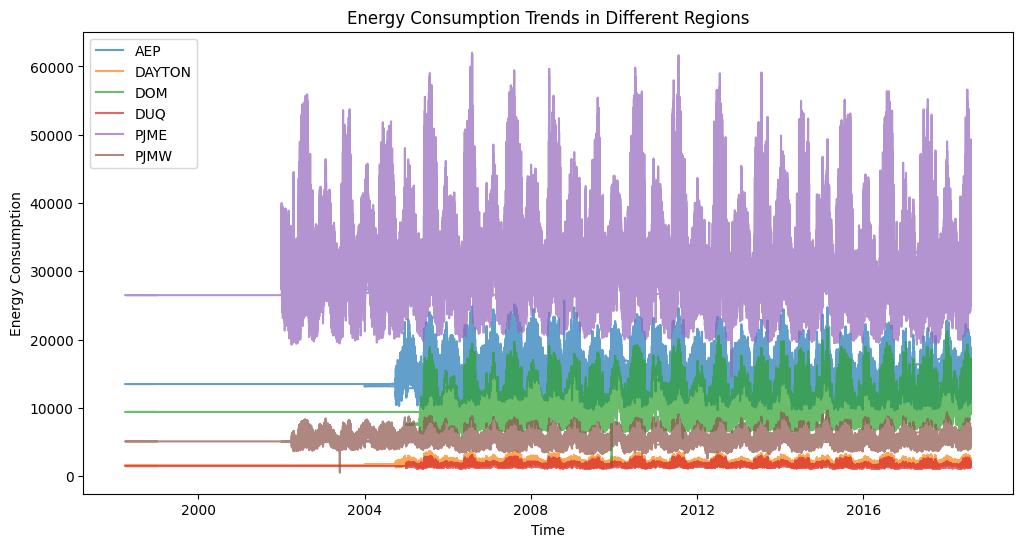

In [ ]:
plt.figure(figsize=(12, 6))
for col in ['AEP', 'DAYTON', 'DOM', 'DUQ', 'PJME', 'PJMW']:
    plt.plot(df.index, df[col], label=col, alpha=0.7)

plt.xlabel('Time')
plt.ylabel('Energy Consumption')
plt.title('Energy Consumption Trends in Different Regions')
plt.legend()
plt.show()


<Figure size 1200x600 with 0 Axes>

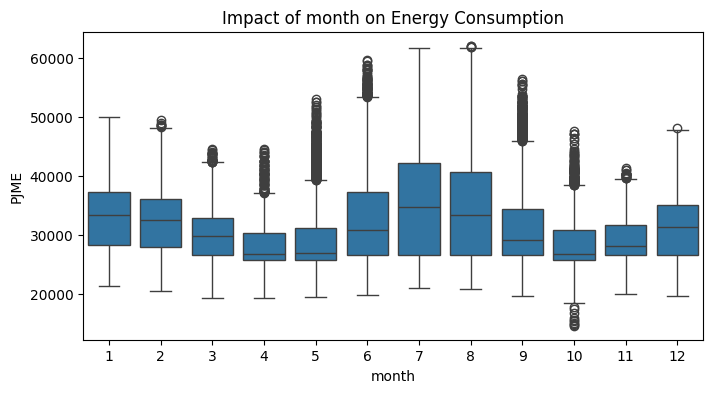

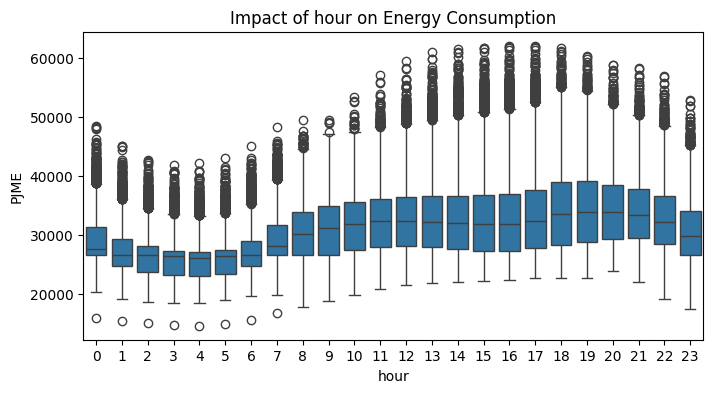

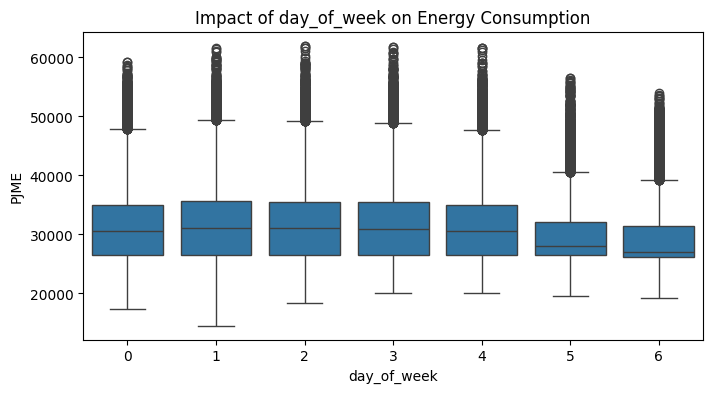

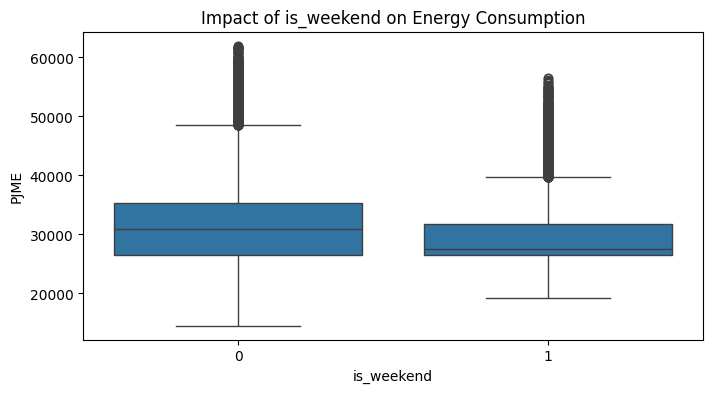

<Figure size 1200x600 with 0 Axes>

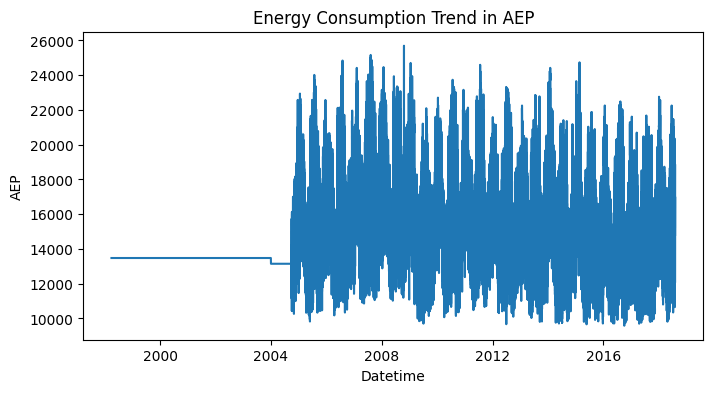

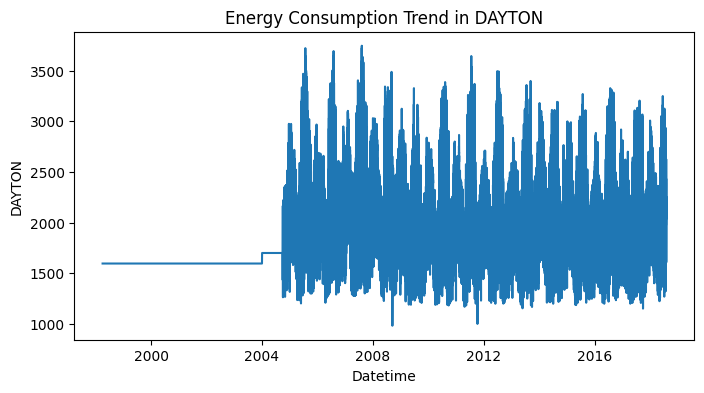

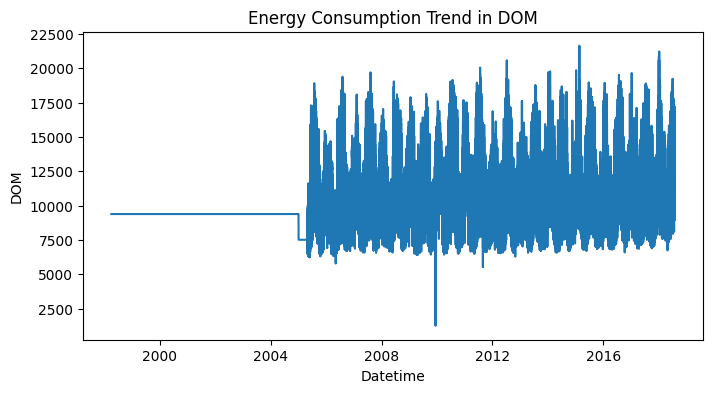

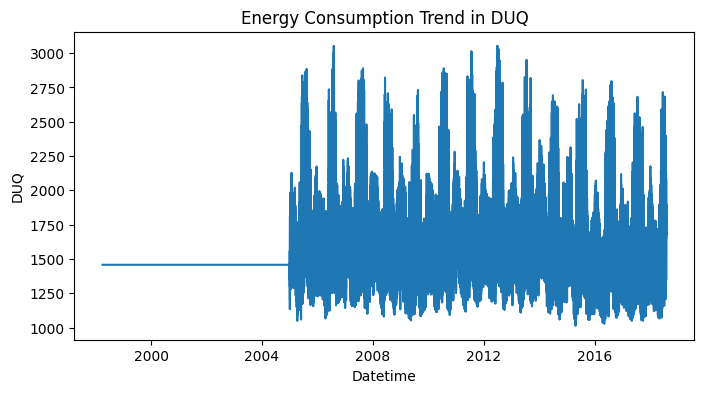

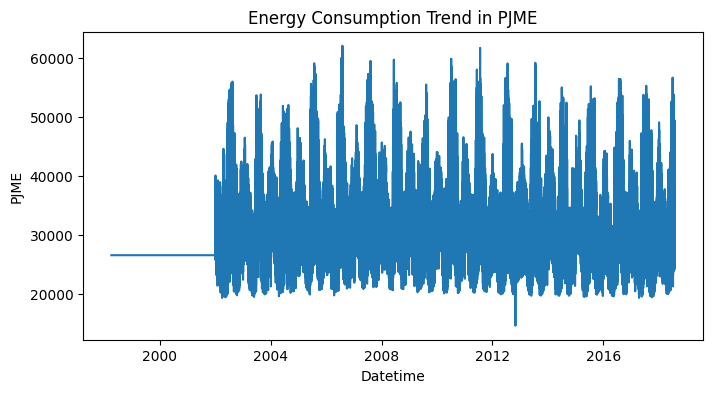

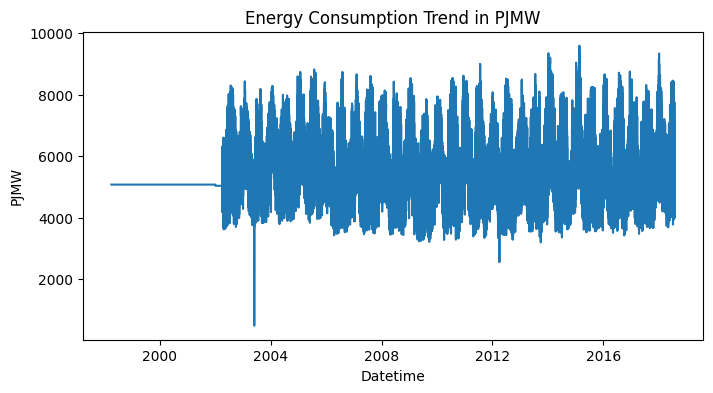

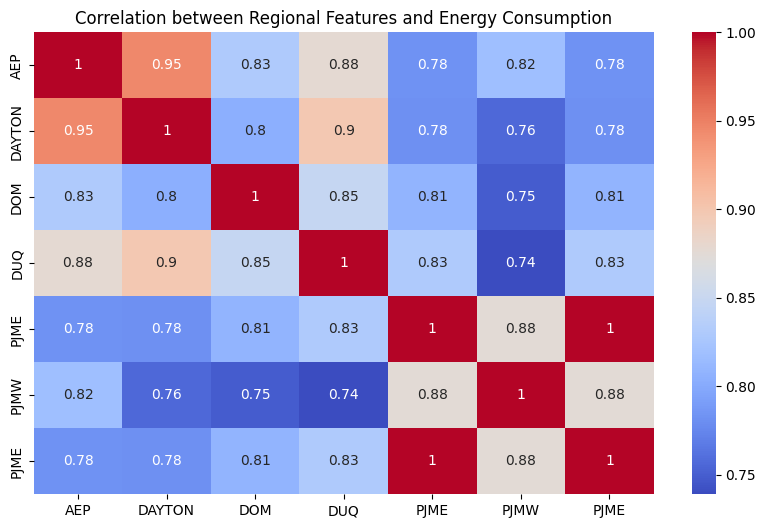

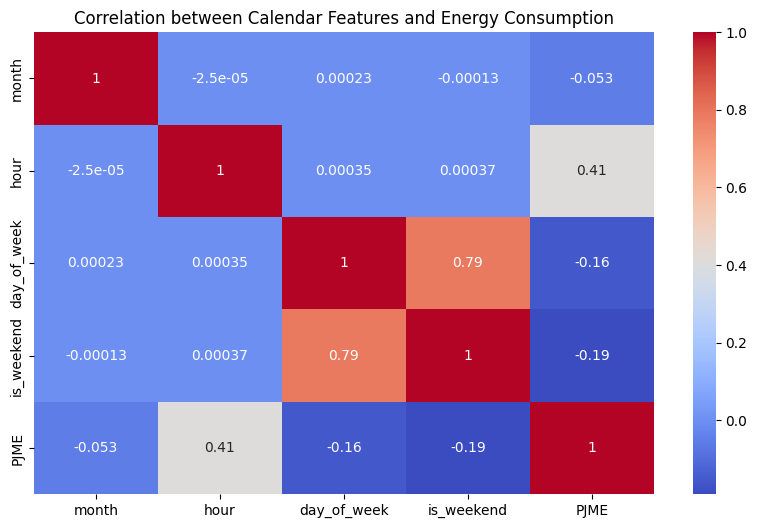

In [ ]:
import seaborn as sns

# **تفکیک ویژگی‌های منطقه‌ای و تقویمی**
calendar_features = ['month', 'hour', 'day_of_week', 'is_weekend']
regional_features = ['AEP', 'DAYTON', 'DOM', 'DUQ', 'PJME', 'PJMW']

# **📊 نمایش تأثیر ویژگی‌های تقویمی روی مصرف برق**
plt.figure(figsize=(12, 6))
for feature in calendar_features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[feature], y=df['PJME'])  # تغییر به Total_Load در صورت نیاز
    plt.title(f'Impact of {feature} on Energy Consumption')
    plt.show()

# **📊 نمایش تأثیر ویژگی‌های منطقه‌ای روی مصرف برق**
plt.figure(figsize=(12, 6))
for feature in regional_features:
    plt.figure(figsize=(8, 4))
    sns.lineplot(data=df, x=df.index, y=df[feature])
    plt.title(f'Energy Consumption Trend in {feature}')
    plt.show()

# **📌 بررسی همبستگی بین ویژگی‌های منطقه‌ای و مصرف برق**
plt.figure(figsize=(10, 6))
sns.heatmap(df[regional_features + ['PJME']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation between Regional Features and Energy Consumption")
plt.show()

# **📌 بررسی همبستگی بین ویژگی‌های تقویمی و مصرف برق**
plt.figure(figsize=(10, 6))
sns.heatmap(df[calendar_features + ['PJME']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation between Calendar Features and Energy Consumption")
plt.show()


In [ ]:
# بررسی طول داده‌ها
print(len(df[calendar_features + ['PJME']]))  # برای ویژگی‌های تقویمی
print(len(df[regional_features + ['PJME']]))  # برای ویژگی‌های منطقه‌ای

# ** ذخیره نتایج همبستگی برای ویژگی‌های منطقه‌ای و تقویمی**
calendar_corr = df[calendar_features + ['PJME']].corr()
regional_corr = df[regional_features + ['PJME']].corr()

# ذخیره کردن نتایج همبستگی در فایل CSV
calendar_corr.to_csv('/content/calendar_corr.csv')
regional_corr.to_csv('/content/regional_corr.csv')

print("همبستگی ویژگی‌های تقویمی:")
print(calendar_corr)
print("\nهمبستگی ویژگی‌های منطقه‌ای:")
print(regional_corr)

# ** محاسبه میانگین و انحراف معیار برای ویژگی‌های منطقه‌ای**
regional_stats = df[regional_features].describe()

# ذخیره کردن نتایج آمار توصیفی
regional_stats.to_csv('/content/regional_stats.csv')

print("\nآمار توصیفی ویژگی‌های منطقه‌ای:")
print(regional_stats)

# ** مهمترین ویژگی‌ها - بررسی همخوانی طول‌ها**
feature_importance = model_rf.feature_importances_

# برای مطمئن شدن از اینکه تعداد ویژگی‌ها با تعداد امتیازهای اهمیت همخوانی دارد
importance_df = pd.DataFrame({'Feature': regional_features + calendar_features, 'Importance': feature_importance[:len(regional_features + calendar_features)]})

importance_df = importance_df.sort_values(by='Importance', ascending=False)

# ذخیره کردن نتایج مهمترین ویژگی‌ها
importance_df.to_csv('/content/feature_importance.csv')

print("\nمهمترین ویژگی‌ها:")
print(importance_df)


178262
178262
همبستگی ویژگی‌های تقویمی:
                month      hour  day_of_week  is_weekend      PJME
month        1.000000 -0.000025     0.000230   -0.000134 -0.052961
hour        -0.000025  1.000000     0.000351    0.000369  0.411717
day_of_week  0.000230  0.000351     1.000000    0.790464 -0.155096
is_weekend  -0.000134  0.000369     0.790464    1.000000 -0.189873
PJME        -0.052961  0.411717    -0.155096   -0.189873  1.000000

همبستگی ویژگی‌های منطقه‌ای:
             AEP    DAYTON       DOM       DUQ      PJME      PJMW      PJME
AEP     1.000000  0.945123  0.830298  0.877068  0.782507  0.818408  0.782507
DAYTON  0.945123  1.000000  0.803917  0.898483  0.781668  0.755669  0.781668
DOM     0.830298  0.803917  1.000000  0.847125  0.807364  0.748210  0.807364
DUQ     0.877068  0.898483  0.847125  1.000000  0.829728  0.738892  0.829728
PJME    0.782507  0.781668  0.807364  0.829728  1.000000  0.875317  1.000000
PJMW    0.818408  0.755669  0.748210  0.738892  0.875317  1.000000 

Mean Absolute Error: 0.21984573528160076
Mean Squared Error: 18.897203752839957
Root Mean Squared Error: 4.347091412984084


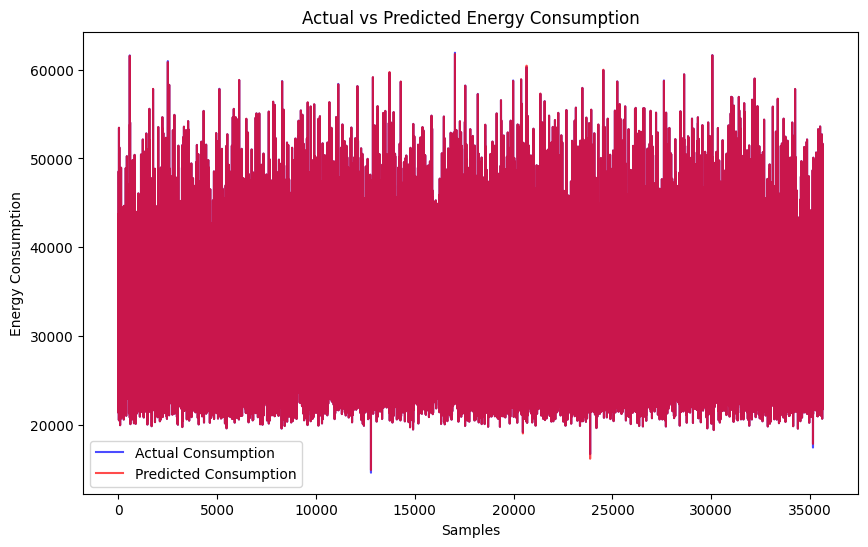

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# ویژگی‌ها
calendar_features = ['month', 'hour', 'day_of_week', 'is_weekend']
regional_features = ['AEP', 'DAYTON', 'DOM', 'DUQ', 'PJME', 'PJMW']  # ویژگی‌های منطقه‌ای

# متغیر هدف
target = 'PJME'

# داده‌های ورودی برای پیش‌بینی
X = df[calendar_features + regional_features]
y = df[target]

# تقسیم داده‌ها به مجموعه آموزشی و آزمایشی
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# مدل رندوم فارست
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)

# پیش‌بینی مصرف انرژی
y_pred = model_rf.predict(X_test)

# ارزیابی عملکرد مدل
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")

# نمودار مقایسه پیش‌بینی‌ها و مقادیر واقعی
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual Consumption', color='blue', alpha=0.7)
plt.plot(y_pred, label='Predicted Consumption', color='red', alpha=0.7)
plt.xlabel('Samples')
plt.ylabel('Energy Consumption')
plt.title('Actual vs Predicted Energy Consumption')
plt.legend()
plt.show()


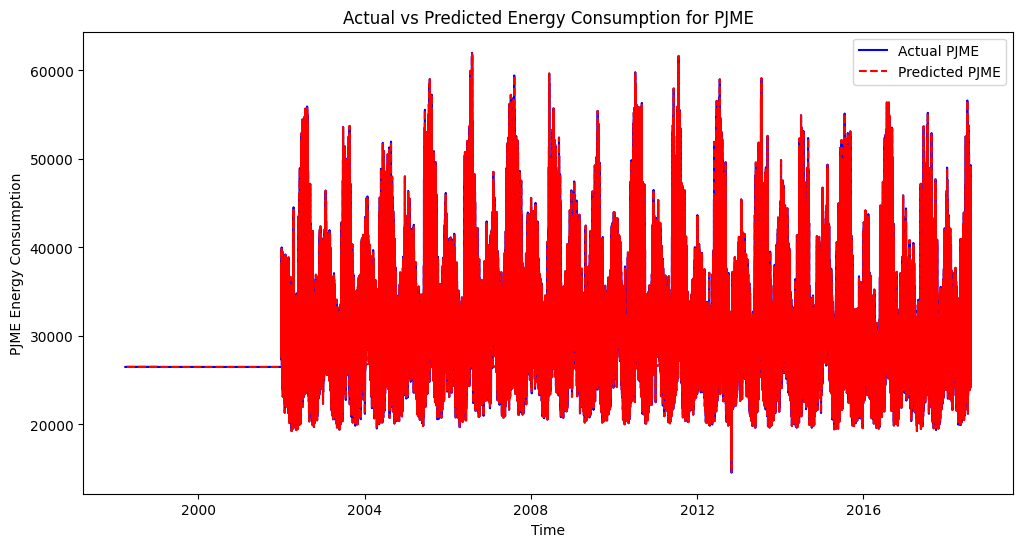

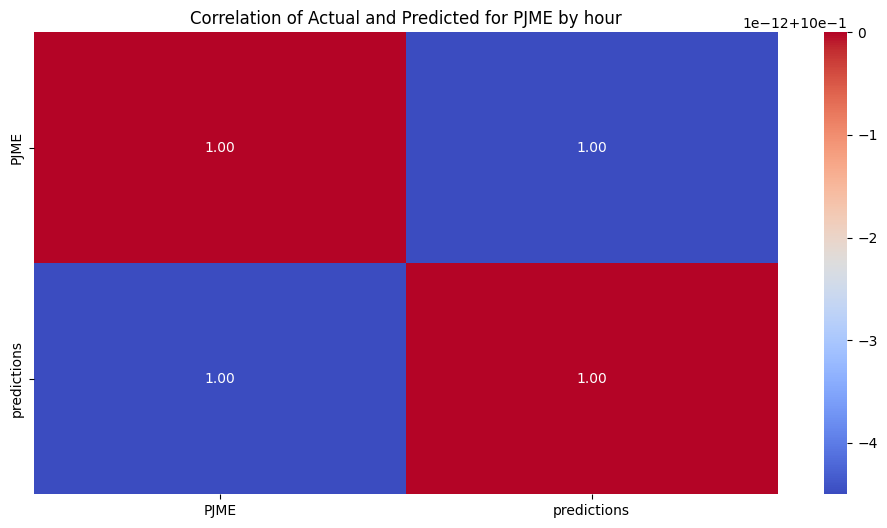

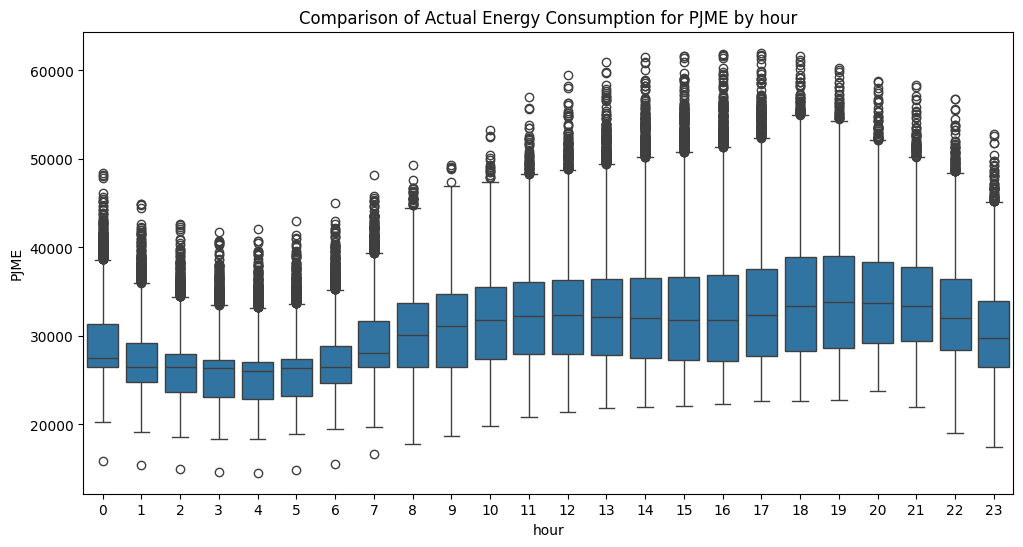

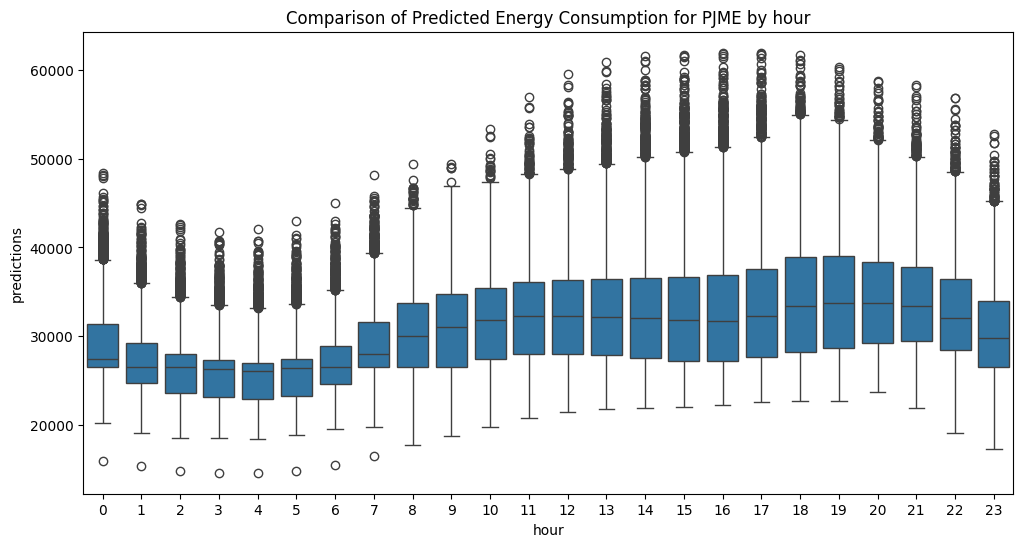

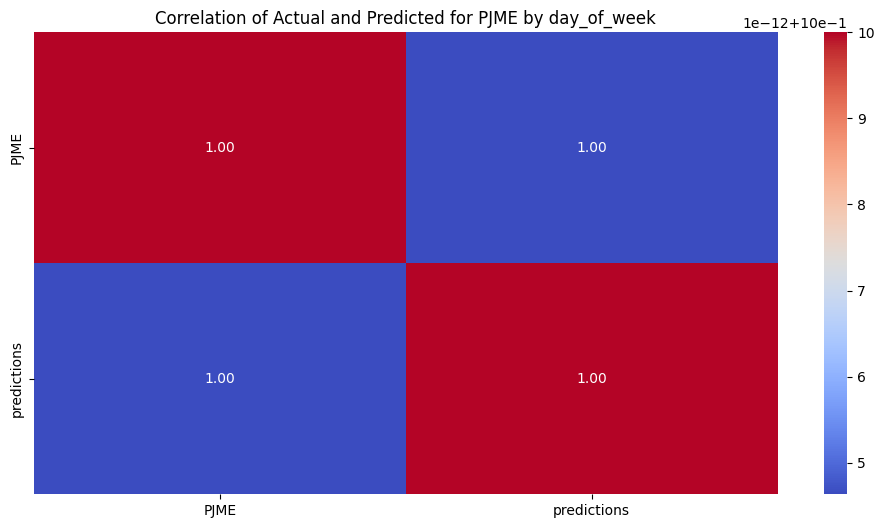

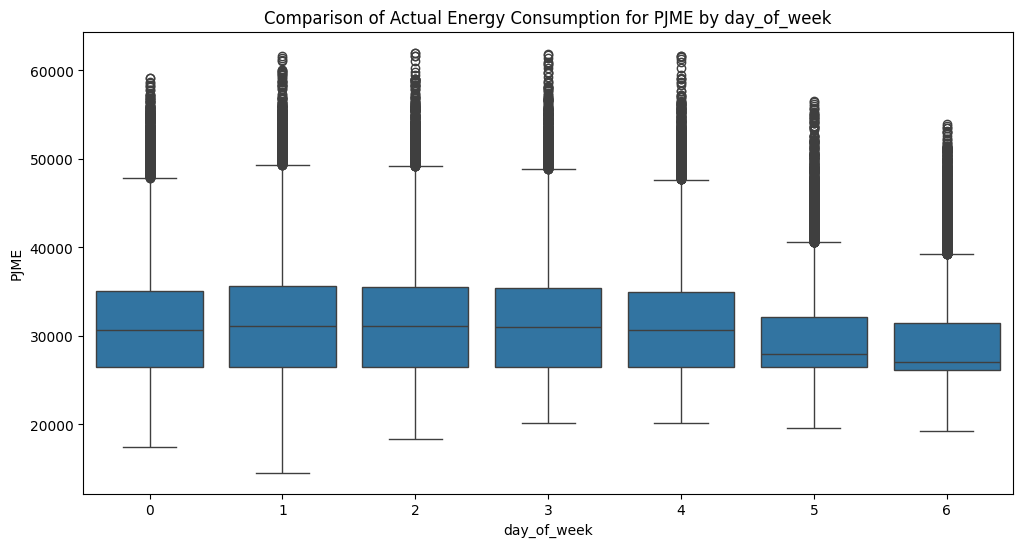

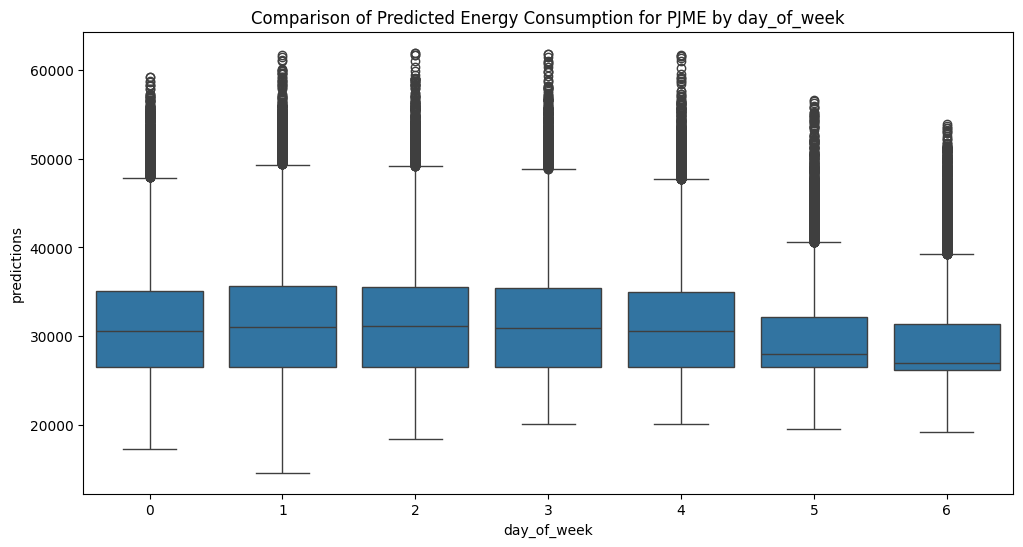

KeyError: 'season'

<Figure size 1200x600 with 0 Axes>

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
import pandas as pd

# تعریف ویژگی‌های مورد نظر برای پیش‌بینی
features = ['hour', 'day_of_week', 'season']

# انتخاب منطقه دلخواه برای پیش‌بینی
region = 'PJME'

# کد آموزش مدل روی کل داده‌ها
X = df[calendar_features + regional_features].dropna()
y = df[region].dropna()

# آموزش مدل RandomForest
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X, y)

# پیش‌بینی‌ها
predictions = model_rf.predict(X)

# اضافه کردن پیش‌بینی‌ها به دیتافریم
df['predictions'] = pd.Series(predictions, index=X.index)

# مقایسه پیش‌بینی با داده‌های اصلی در قالب نمودار
plt.figure(figsize=(12, 6))
plt.plot(df.index, df[region], label='Actual ' + region, color='blue')
plt.plot(df.index, df['predictions'], label='Predicted ' + region, color='red', linestyle='--')
plt.xlabel('Time')
plt.ylabel(region + ' Energy Consumption')
plt.title('Actual vs Predicted Energy Consumption for ' + region)
plt.legend()
plt.show()

# بررسی پیش‌بینی‌ها بر اساس ویژگی‌های تقویمی: فصل، ساعت، و روز هفته
for feature in features:
    plt.figure(figsize=(12, 6))

    # اصلاح گروه‌بندی با استفاده از لیست به جای tuple
    df_grouped = df.groupby([feature])[[region, 'predictions']].mean()  # اصلاح گروه‌بندی

    # رسم هیت‌مپ برای همبستگی مقادیر اصلی و پیش‌بینی‌ها
    sns.heatmap(df_grouped.corr(), annot=True, cmap='coolwarm', fmt='.2f')
    plt.title(f'Correlation of Actual and Predicted for {region} by {feature}')
    plt.show()

    # مقایسه پیش‌بینی‌ها و داده‌های اصلی بر اساس ویژگی‌های مختلف
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=feature, y=region, data=df)
    plt.title(f'Comparison of Actual Energy Consumption for {region} by {feature}')
    plt.show()

    plt.figure(figsize=(12, 6))
    sns.boxplot(x=feature, y='predictions', data=df)
    plt.title(f'Comparison of Predicted Energy Consumption for {region} by {feature}')
    plt.show()

# نمایش هیت‌مپ ترکیبی از پیش‌بینی‌ها و مقایسه ویژگی‌ها
df['season'] = df['season'].astype('category')
df['hour'] = df['hour'].astype('category')
df['day_of_week'] = df['day_of_week'].astype('category')

# ایجاد یک دیتا فریم برای ترکیب ویژگی‌های مختلف
heatmap_data = df.groupby(['season', 'hour', 'day_of_week'])['predictions'].mean().unstack(fill_value=0)

# رسم هیت‌مپ
plt.figure(figsize=(14, 10))
sns.heatmap(heatmap_data, cmap="YlGnBu", annot=True)
plt.title(f'Predictions Heatmap for {region}')
plt.xlabel('Hour')
plt.ylabel('Season and Day of Week')
plt.show()


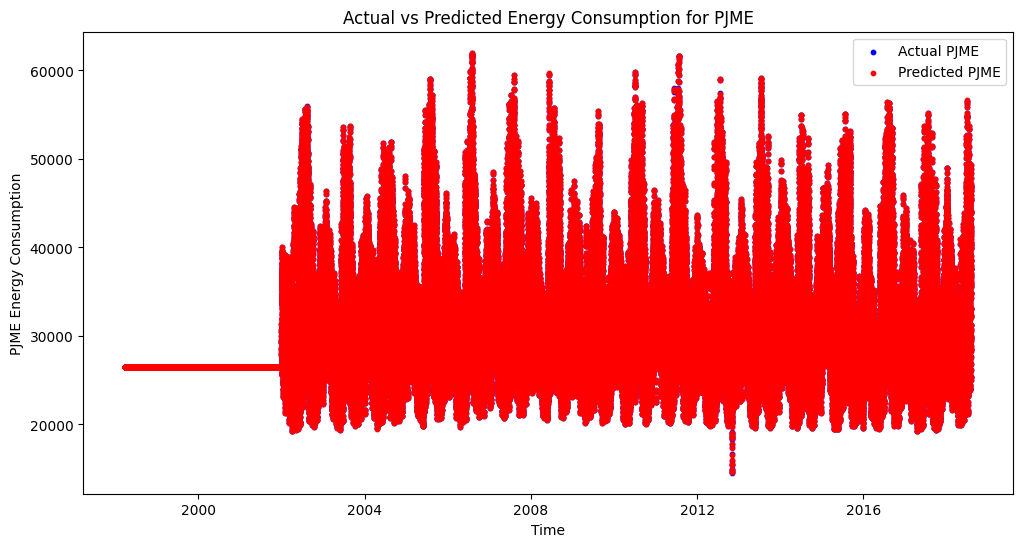

In [ ]:
# مقایسه پیش‌بینی‌ها با داده‌های واقعی به صورت scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(df.index, df[region], label='Actual ' + region, color='blue', s=10)
plt.scatter(df.index, df['predictions'], label='Predicted ' + region, color='red', s=10)
plt.xlabel('Time')
plt.ylabel(region + ' Energy Consumption')
plt.title('Actual vs Predicted Energy Consumption for ' + region)
plt.legend()
plt.show()


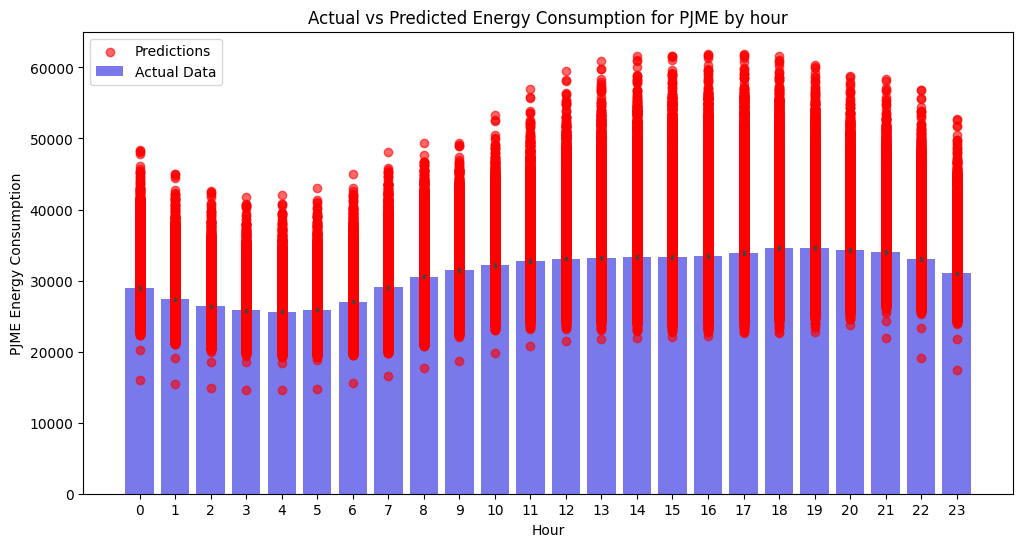

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# انتخاب ویژگی‌ها و منطقه
region = 'PJME'
feature = 'hour'  # می‌توانید ویژگی‌های مختلف مثل ساعت، روز هفته یا فصل رو انتخاب کنید

# انتخاب دیتافریم نهایی با حذف مقادیر نال
df_clean = df.dropna(subset=[region, 'predictions'])

# رسم نمودار
plt.figure(figsize=(12, 6))

# داده‌های واقعی: استفاده از میله‌ها
sns.barplot(x=df_clean[feature], y=df_clean[region], color='blue', alpha=0.6, label='Actual Data')

# داده‌های پیش‌بینی‌شده: استفاده از دایره‌ها
plt.scatter(df_clean[feature], df_clean['predictions'], color='red', label='Predictions', alpha=0.6)

plt.xlabel(f'{feature.capitalize()}')
plt.ylabel(f'{region} Energy Consumption')
plt.title(f'Actual vs Predicted Energy Consumption for {region} by {feature}')
plt.legend()
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

# 1. بررسی و پردازش داده‌های اصلی
df = df.dropna()  # حذف مقادیر Null

# تعریف ویژگی‌های مورد استفاده
calendar_features = ['hour', 'day_of_week', 'month', 'season']
regional_features = [col for col in df.columns if col.startswith('Region_')]  # استخراج ویژگی‌های منطقه‌ای

# اطمینان از عدم وجود PJME در ویژگی‌ها
regional_features = [feature for feature in regional_features if feature != 'PJME']

# ایجاد متغیر هدف
X = df[calendar_features + regional_features]
y = df['PJME']

# 2. آموزش مدل
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X, y)

# 3. ایجاد داده‌های 5 سال آینده
future_dates = pd.date_range(start=df.index.max(), periods=5 * 365 * 24, freq='H')  # تولید داده‌های ساعتی برای 5 سال

# ساخت دیتافریم آینده
future_data = pd.DataFrame(index=future_dates)

# استخراج ویژگی‌های زمانی از داده‌های آینده
future_data['hour'] = future_data.index.hour
future_data['day_of_week'] = future_data.index.dayofweek
future_data['month'] = future_data.index.month
future_data['season'] = (future_data['month'] % 12 + 3) // 3  # تبدیل ماه به فصل

# تنظیم ویژگی‌های منطقه‌ای (میانگین مقدار فعلی)
for feature in regional_features:
    future_data[feature] = df[feature].mean()

# 4. انجام پیش‌بینی
X_future = future_data[calendar_features + regional_features]
predictions_future = model_rf.predict(X_future)

# 5. اضافه کردن نتایج به دیتافریم
future_data['predictions'] = predictions_future

# 6. رسم نمودار
plt.figure(figsize=(14, 6))
plt.plot(df.index, df['PJME'], label='Actual Consumption', color='blue')
plt.plot(future_data.index, future_data['predictions'], label='Predicted Consumption (Next 5 Years)', color='red', linestyle='--')
plt.xlabel('Time')
plt.ylabel('Energy Consumption')
plt.title('Actual vs Predicted Energy Consumption for Next 5 Years')
plt.legend()
plt.show()

# 7. رسم هیت‌مپ تغییرات بر اساس فصل و ساعت
heatmap_data = future_data.pivot_table(values='predictions', index='season', columns='hour', aggfunc='mean')

plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=False)
plt.title('Predicted Energy Consumption Heatmap (Season vs Hour)')
plt.xlabel('Hour of the Day')
plt.ylabel('Season')
plt.show()


KeyError: "['month'] not in index"

<ipython-input-179-2c1e1a3242ee>:39: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  future_dates = pd.date_range(start=df.index.max(), periods=5 * 365 * 24, freq='H')


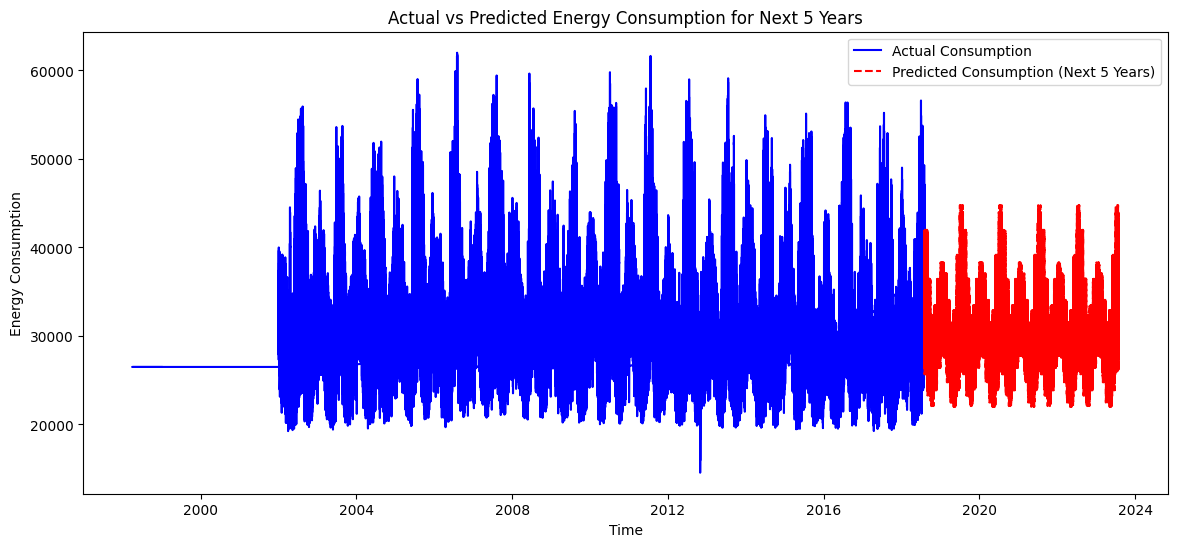

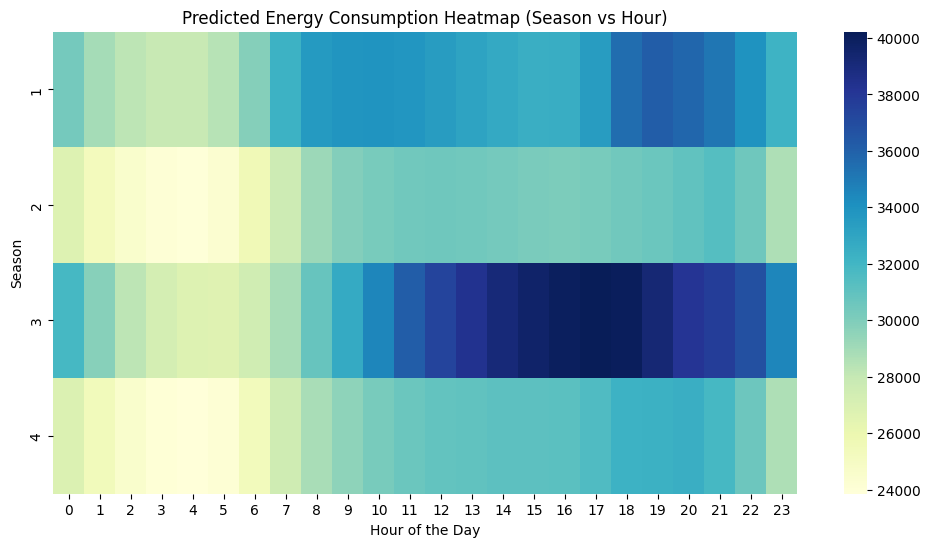

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

# 1. بررسی و پردازش داده‌های اصلی
df = df.dropna()  # حذف مقادیر Null

# اگر ستون Datetime وجود ندارد، ایجاد آن از ایندکس
if 'Datetime' not in df.columns:
    df['Datetime'] = df.index

df['Datetime'] = pd.to_datetime(df['Datetime'])  # اطمینان از فرمت زمانی
df.set_index('Datetime', inplace=True)  # تنظیم ایندکس به Datetime

# تعریف ویژگی‌های تقویمی و منطقه‌ای
calendar_features = ['hour', 'day_of_week', 'month', 'season']
regional_features = [col for col in df.columns if col.startswith('Region_')]

# حذف 'PJME' از ویژگی‌ها (چون هدف مدل است)
regional_features = [feature for feature in regional_features if feature != 'PJME']

# استخراج ویژگی‌های زمانی
df['hour'] = df.index.hour
df['day_of_week'] = df.index.dayofweek
df['month'] = df.index.month
df['season'] = (df['month'] % 12 + 3) // 3  # تبدیل ماه به فصل

# ایجاد متغیرهای ورودی و خروجی
X = df[calendar_features + regional_features]
y = df['PJME']

# 2. آموزش مدل
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X, y)

# 3. ایجاد داده‌های 5 سال آینده
future_dates = pd.date_range(start=df.index.max(), periods=5 * 365 * 24, freq='H')

# ساخت دیتافریم آینده
future_data = pd.DataFrame(index=future_dates)

# استخراج ویژگی‌های زمانی برای داده‌های آینده
future_data['hour'] = future_data.index.hour
future_data['day_of_week'] = future_data.index.dayofweek
future_data['month'] = future_data.index.month
future_data['season'] = (future_data['month'] % 12 + 3) // 3

# تنظیم ویژگی‌های منطقه‌ای (میانگین مقدار فعلی)
for feature in regional_features:
    future_data[feature] = df[feature].mean()

# 4. انجام پیش‌بینی
X_future = future_data[calendar_features + regional_features]
predictions_future = model_rf.predict(X_future)

# 5. اضافه کردن نتایج به دیتافریم
future_data['predictions'] = predictions_future

# 6. رسم نمودار مقایسه‌ای
plt.figure(figsize=(14, 6))
plt.plot(df.index, df['PJME'], label='Actual Consumption', color='blue')
plt.plot(future_data.index, future_data['predictions'], label='Predicted Consumption (Next 5 Years)', color='red', linestyle='--')
plt.xlabel('Time')
plt.ylabel('Energy Consumption')
plt.title('Actual vs Predicted Energy Consumption for Next 5 Years')
plt.legend()
plt.show()

# 7. رسم هیت‌مپ تغییرات بر اساس فصل و ساعت
heatmap_data = future_data.pivot_table(values='predictions', index='season', columns='hour', aggfunc='mean')

plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=False)
plt.title('Predicted Energy Consumption Heatmap (Season vs Hour)')
plt.xlabel('Hour of the Day')
plt.ylabel('Season')
plt.show()
